In [66]:
import os
import matplotlib as mp
import pandas as pd
import plotly as pt
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [67]:
%matplotlib notebook

In [68]:
#Creat a csv for each date
path_M = os.path.join('Resources/Mike_posts_and_comments.CSV.csv') 
Mike_df = pd.read_csv (path_M)
path_A = os.path.join('Resources/Andres_posts_and_comments.CSV.csv') 
Andres_df = pd.read_csv (path_A)
path_C= os.path.join('Resources/Chey_posts_and_comments.CSV.csv') 
Chey_df = pd.read_csv (path_C)
path_B= os.path.join('Resources/Bruna_posts_and_comments.CSV.csv') 
Bruna_df = pd.read_csv (path_B)


In [69]:
#Filter CSV 
tm_C = Chey_df['reactions/timestamp']
tm_M = Mike_df['Timestamp']
tm_A = Andres_df['reactions/timestamp']
tm_B = Bruna_df['reactions/timestamp']

In [70]:
#Create columns Year, Month, Day, Hour

#Chey
Chey_df['Timestamp'] = pd.to_datetime(tm_C,unit='s', yearfirst=True) 
Chey_df['Year']= Chey_df['Timestamp'].dt.year
Chey_df['Month']= Chey_df['Timestamp'].dt.month
Chey_df['Day']= Chey_df['Timestamp'].dt.day
Chey_df['Hour']= Chey_df['Timestamp'].dt.hour

#Mike
Mike_df['Timestamp'] = pd.to_datetime(tm_M,unit='s', yearfirst=True) 
Mike_df['Year']= Mike_df['Timestamp'].dt.year
Mike_df['Month']= Mike_df['Timestamp'].dt.month
Mike_df['Day']= Mike_df['Timestamp'].dt.day
Mike_df['Hour']= Mike_df['Timestamp'].dt.hour

#Andres
Andres_df['Timestamp'] = pd.to_datetime(tm_A,unit='s', yearfirst=True) 
Andres_df['Year']= Andres_df['Timestamp'].dt.year
Andres_df['Month']= Andres_df['Timestamp'].dt.month
Andres_df['Day']= Andres_df['Timestamp'].dt.day
Andres_df['Hour']= Andres_df['Timestamp'].dt.hour

#Bruna
Bruna_df['Timestamp'] = pd.to_datetime(tm_B, unit ='s', yearfirst=True) 
Bruna_df['Year']= Bruna_df['Timestamp'].dt.year
Bruna_df['Month']= Bruna_df['Timestamp'].dt.month
Bruna_df['Day']= Bruna_df['Timestamp'].dt.day
Bruna_df['Hour']= Bruna_df['Timestamp'].dt.hour



In [71]:
#Clean our Data Frame

#Chey
Chey_df.columns = ['stand', 'Reaction','User','Action','Nan0','Nan','Nan1','Nan3','Timestamp','Year','Month','Day','Hour']
Chey2_df = Chey_df.drop(columns=['stand','Nan0','Nan','Nan1','Nan3'])

#Mike
Mike_df = Mike_df.drop(columns=['Uri'])
Mike2_df = Mike_df.reindex(columns = ['Reaction','User','Action','Timestamp','Year',"Month",'Day','Hour'])

#Andres
Andres_df.columns = ['stand', 'Reaction','User','Action','Nan','Timestamp','Year','Month','Day','Hour']
Andres2_df = Andres_df.drop(columns=['stand','Nan'])

#Bruna
Bruna_df.columns = ['stand', 'Reaction','User','Action','Nan','Timestamp','Year','Month','Day','Hour']
Bruna2_df = Bruna_df.drop(columns=['stand','Nan'])


In [72]:
print(Bruna2_df['Reaction'].unique())
print(Chey_df['Reaction'].unique())
print(Andres_df['Reaction'].unique())
print(Mike_df['Reaction'].unique())

['LIKE' 'LOVE' 'HAHA' 'SORRY']
['LOVE' 'LIKE' 'HAHA' 'SORRY' 'WOW']
['LOVE' 'LIKE' 'HAHA' 'ANGER' 'WOW' 'SORRY']
['LIKE' 'LOVE' 'HAHA']


In [73]:
full_df = pd.concat([Chey2_df,Mike2_df,Andres2_df])
full_df

,Reaction,User,Action,Timestamp,Year,Month,Day,Hour
0,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Danielle Carter's post.,2020-12-29 14:56:49,2020,12,29,14
1,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Durel Hairston Jr.'s ...,2020-12-29 14:53:05,2020,12,29,14
2,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Sean Holley's post.,2020-12-29 14:52:15,2020,12,29,14
3,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Toriano Thomas's photo.,2020-12-29 04:25:59,2020,12,29,4
4,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Toriano Thomas's photo.,2020-12-28 03:43:43,2020,12,28,3
...,...,...,...,...,...,...,...,...
7071,LIKE,Andres Alcaraz,Andres Alcaraz likes Vicente Narvaez Castillo'...,2011-05-02 20:26:27,2011,5,2,20
7072,LIKE,Andres Alcaraz,Andres Alcaraz likes Oliverio Ortega's post.,2011-05-01 23:46:32,2011,5,1,23
7073,LIKE,Andres Alcaraz,Andres Alcaraz likes Max Danel's photo.,2011-05-01 23:27:54,2011,5,1,23
7074,LIKE,Andres Alcaraz,Andres Alcaraz likes Vicente Narvaez Castillo'...,2011-04-12 12:27:11,2011,4,12,12


In [74]:
print(full_df['Reaction'].unique())
    

['LOVE' 'LIKE' 'HAHA' 'SORRY' 'WOW' 'ANGER']


In [75]:
def reactionToNumber(reaction):
    if reaction == "LIKE":
        return 1
    if reaction == "LOVE":
        return 1
    if reaction == "HAHA":
        return 1
    if reaction == "SORRY":
        return 1
    if reaction == "WOW":
        return 1
    if reaction == "ANGER":
        return 1



In [76]:
full_df['Reaction to Number']= full_df['Reaction'].map(reactionToNumber)  
full_df


,Reaction,User,Action,Timestamp,Year,Month,Day,Hour,Reaction to Number
0,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Danielle Carter's post.,2020-12-29 14:56:49,2020,12,29,14,1
1,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Durel Hairston Jr.'s ...,2020-12-29 14:53:05,2020,12,29,14,1
2,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Sean Holley's post.,2020-12-29 14:52:15,2020,12,29,14,1
3,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Toriano Thomas's photo.,2020-12-29 04:25:59,2020,12,29,4,1
4,LOVE,Chey'Na Bunch,Chey'Na Bunch reacted to Toriano Thomas's photo.,2020-12-28 03:43:43,2020,12,28,3,1
...,...,...,...,...,...,...,...,...,...
7071,LIKE,Andres Alcaraz,Andres Alcaraz likes Vicente Narvaez Castillo'...,2011-05-02 20:26:27,2011,5,2,20,1
7072,LIKE,Andres Alcaraz,Andres Alcaraz likes Oliverio Ortega's post.,2011-05-01 23:46:32,2011,5,1,23,1
7073,LIKE,Andres Alcaraz,Andres Alcaraz likes Max Danel's photo.,2011-05-01 23:27:54,2011,5,1,23,1
7074,LIKE,Andres Alcaraz,Andres Alcaraz likes Vicente Narvaez Castillo'...,2011-04-12 12:27:11,2011,4,12,12,1


In [77]:
Bruna2_df["Reaction To Number"] = Bruna2_df['Reaction'].map(reactionToNumber) 
Bruna2_df

,Reaction,User,Action,Timestamp,Year,Month,Day,Hour,Reaction To Number
0,LIKE,Denise Goncalves,Denise Goncalves curtiu uma publicaÃ§Ã£o de Ma...,2021-01-04 23:36:28,2021,1,4,23,1
1,LIKE,Denise Goncalves,Denise Goncalves curtiu uma publicaÃ§Ã£o de Lu...,2021-01-03 12:38:29,2021,1,3,12,1
2,LIKE,Denise Goncalves,Denise Goncalves curtiu a foto de Maria Isabel...,2021-01-03 12:37:46,2021,1,3,12,1
3,LIKE,Denise Goncalves,Denise Goncalves curtiu a foto de Delcimar Kar...,2021-01-02 18:59:58,2021,1,2,18,1
4,LIKE,Denise Goncalves,Denise Goncalves curtiu uma publicaÃ§Ã£o de Be...,2021-01-02 18:59:13,2021,1,2,18,1
...,...,...,...,...,...,...,...,...,...
6459,LIKE,Denise Goncalves,Denise Goncalves curtiu a foto de Delcimar Kar...,2012-04-22 14:11:44,2012,4,22,14,1
6460,LIKE,Denise Goncalves,Denise Goncalves curtiu a publicaÃ§Ã£o de Vani...,2012-03-07 15:44:09,2012,3,7,15,1
6461,LIKE,Denise Goncalves,Denise Goncalves curtiu uma publicaÃ§Ã£o de Ca...,2012-03-07 15:40:07,2012,3,7,15,1
6462,LIKE,Denise Goncalves,Denise Goncalves curtiu uma publicaÃ§Ã£o de An...,2012-02-09 18:43:45,2012,2,9,18,1


In [78]:
clean = full_df.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
clean


,Hour,Reaction to Number
0,14,1
1,14,1
2,14,1
3,4,1
4,3,1
...,...,...
7071,20,1
7072,23,1
7073,23,1
7074,12,1


In [79]:
bruna_clean = Bruna2_df.drop(columns=['Reaction','User', 'Action','Timestamp','Year','Month','Day'])
bruna_clean

,Hour,Reaction To Number
0,23,1
1,12,1
2,12,1
3,18,1
4,18,1
...,...,...
6459,14,1
6460,15,1
6461,15,1
6462,18,1


In [80]:
hour_sum = clean.groupby("Hour").sum()
hour_sum

,Reaction to Number
Hour,
0,2426
1,2864
2,2507
3,1868
4,979
5,528
6,155
7,100
8,56


In [81]:
hour_sum["Reaction to Number"] = hour_sum["Reaction to Number"]/3
hour_sum

,Reaction to Number
Hour,
0,808.666667
1,954.666667
2,835.666667
3,622.666667
4,326.333333
5,176.000000
6,51.666667
7,33.333333
8,18.666667


In [82]:
bruna_hour_sum = bruna_clean.groupby("Hour").sum()
bruna_hour_sum

,Reaction To Number
Hour,
0,373
1,594
2,310
3,126
4,87
5,21
6,32
7,3
8,2


<IPython.core.display.Javascript object>


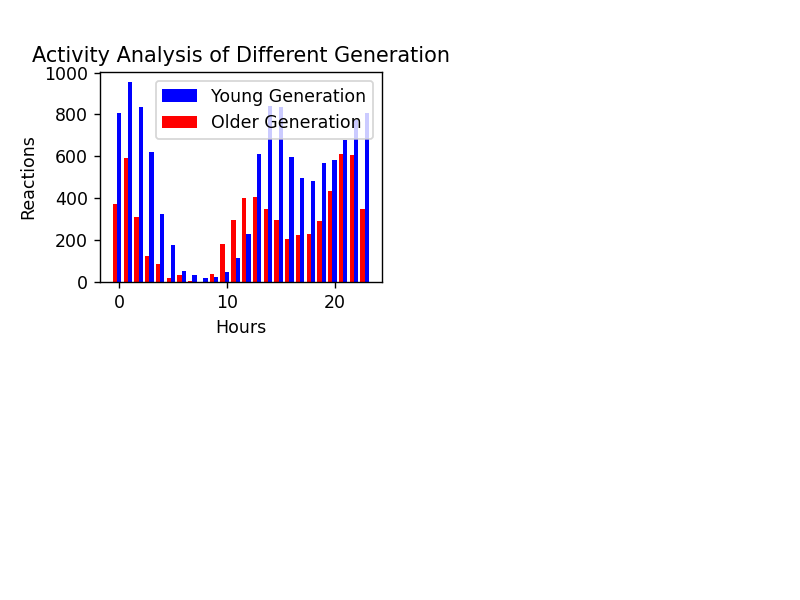

In [84]:
reactions = hour_sum["Reaction to Number"]
hours = hour_sum.index
ax=plt.subplot(2,2,1)
ax.bar(hours, reactions,color ='b',width = 0.4, label = 'Young Generation')

reacts = bruna_hour_sum["Reaction To Number"]
hrs = hour_sum.index
ax.bar(hrs-0.4, reacts,color ='r',width = 0.4, label = 'Older Generation')
ax.set_ylabel('Reactions')
ax.set_xlabel('Hours')
ax.set_title("Activity Analysis of Different Generation")
ax.legend()
